In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:/Users/adm/Documents/Python Scripts/Dataset/titanic.csv', index_col='PassengerId')

In [3]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We will be using Pclass, Sex, Age, SibSp (Siblings aboard), Parch (Parents/children aboard), and Fare to predict whether a passenger survived.

In [4]:
df = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]

We need to convert ‘Sex’ into an integer value of 0 or 1.

In [5]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

We will also drop any rows with missing values.

In [6]:
print(df.head())

             Pclass  Sex   Age  SibSp  Parch     Fare  Survived
PassengerId                                                    
1                 3    0  22.0      1      0   7.2500         0
2                 1    1  38.0      1      0  71.2833         1
3                 3    1  26.0      0      0   7.9250         1
4                 1    1  35.0      1      0  53.1000         1
5                 3    0  35.0      0      0   8.0500         0


In [7]:
df = df.dropna()

In [8]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
PassengerId,,,,,,,
1,3,0,22.0,1,0,7.2500,0
2,1,1,38.0,1,0,71.2833,1
3,3,1,26.0,0,0,7.9250,1
4,1,1,35.0,1,0,53.1000,1
5,3,0,35.0,0,0,8.0500,0


In [9]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Decision Tree

In [11]:
from sklearn import tree

model = tree.DecisionTreeClassifier()

First we fit our model using our training data.

In [12]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Then we score the predicted output from model on our test data against our ground truth test data.

In [13]:
y_predict = model.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.8268156424581006

We see an accuracy score of ~82.2%

Let’s also take a look at our confusion matrix:

In [14]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Predicted Not Survival', 'Predicted Survival'],
    index=['True Not Survival', 'True Survival']
)

,Predicted Not Survival,Predicted Survival
True Not Survival,99,13
True Survival,18,49


In [15]:
#Install one library from Anaconda prompt by typing "conda install -c anaconda graphviz"

In [16]:
dot_data = tree.export_graphviz(model,
                                feature_names=X.columns,
                                out_file='tree.dot',
                                filled=True,
                                rounded=True)

In [17]:
#To install this package with conda run:
#conda install -c conda-forge pydotplus 

In [18]:
!dot -Tpng tree.dot > tree.png

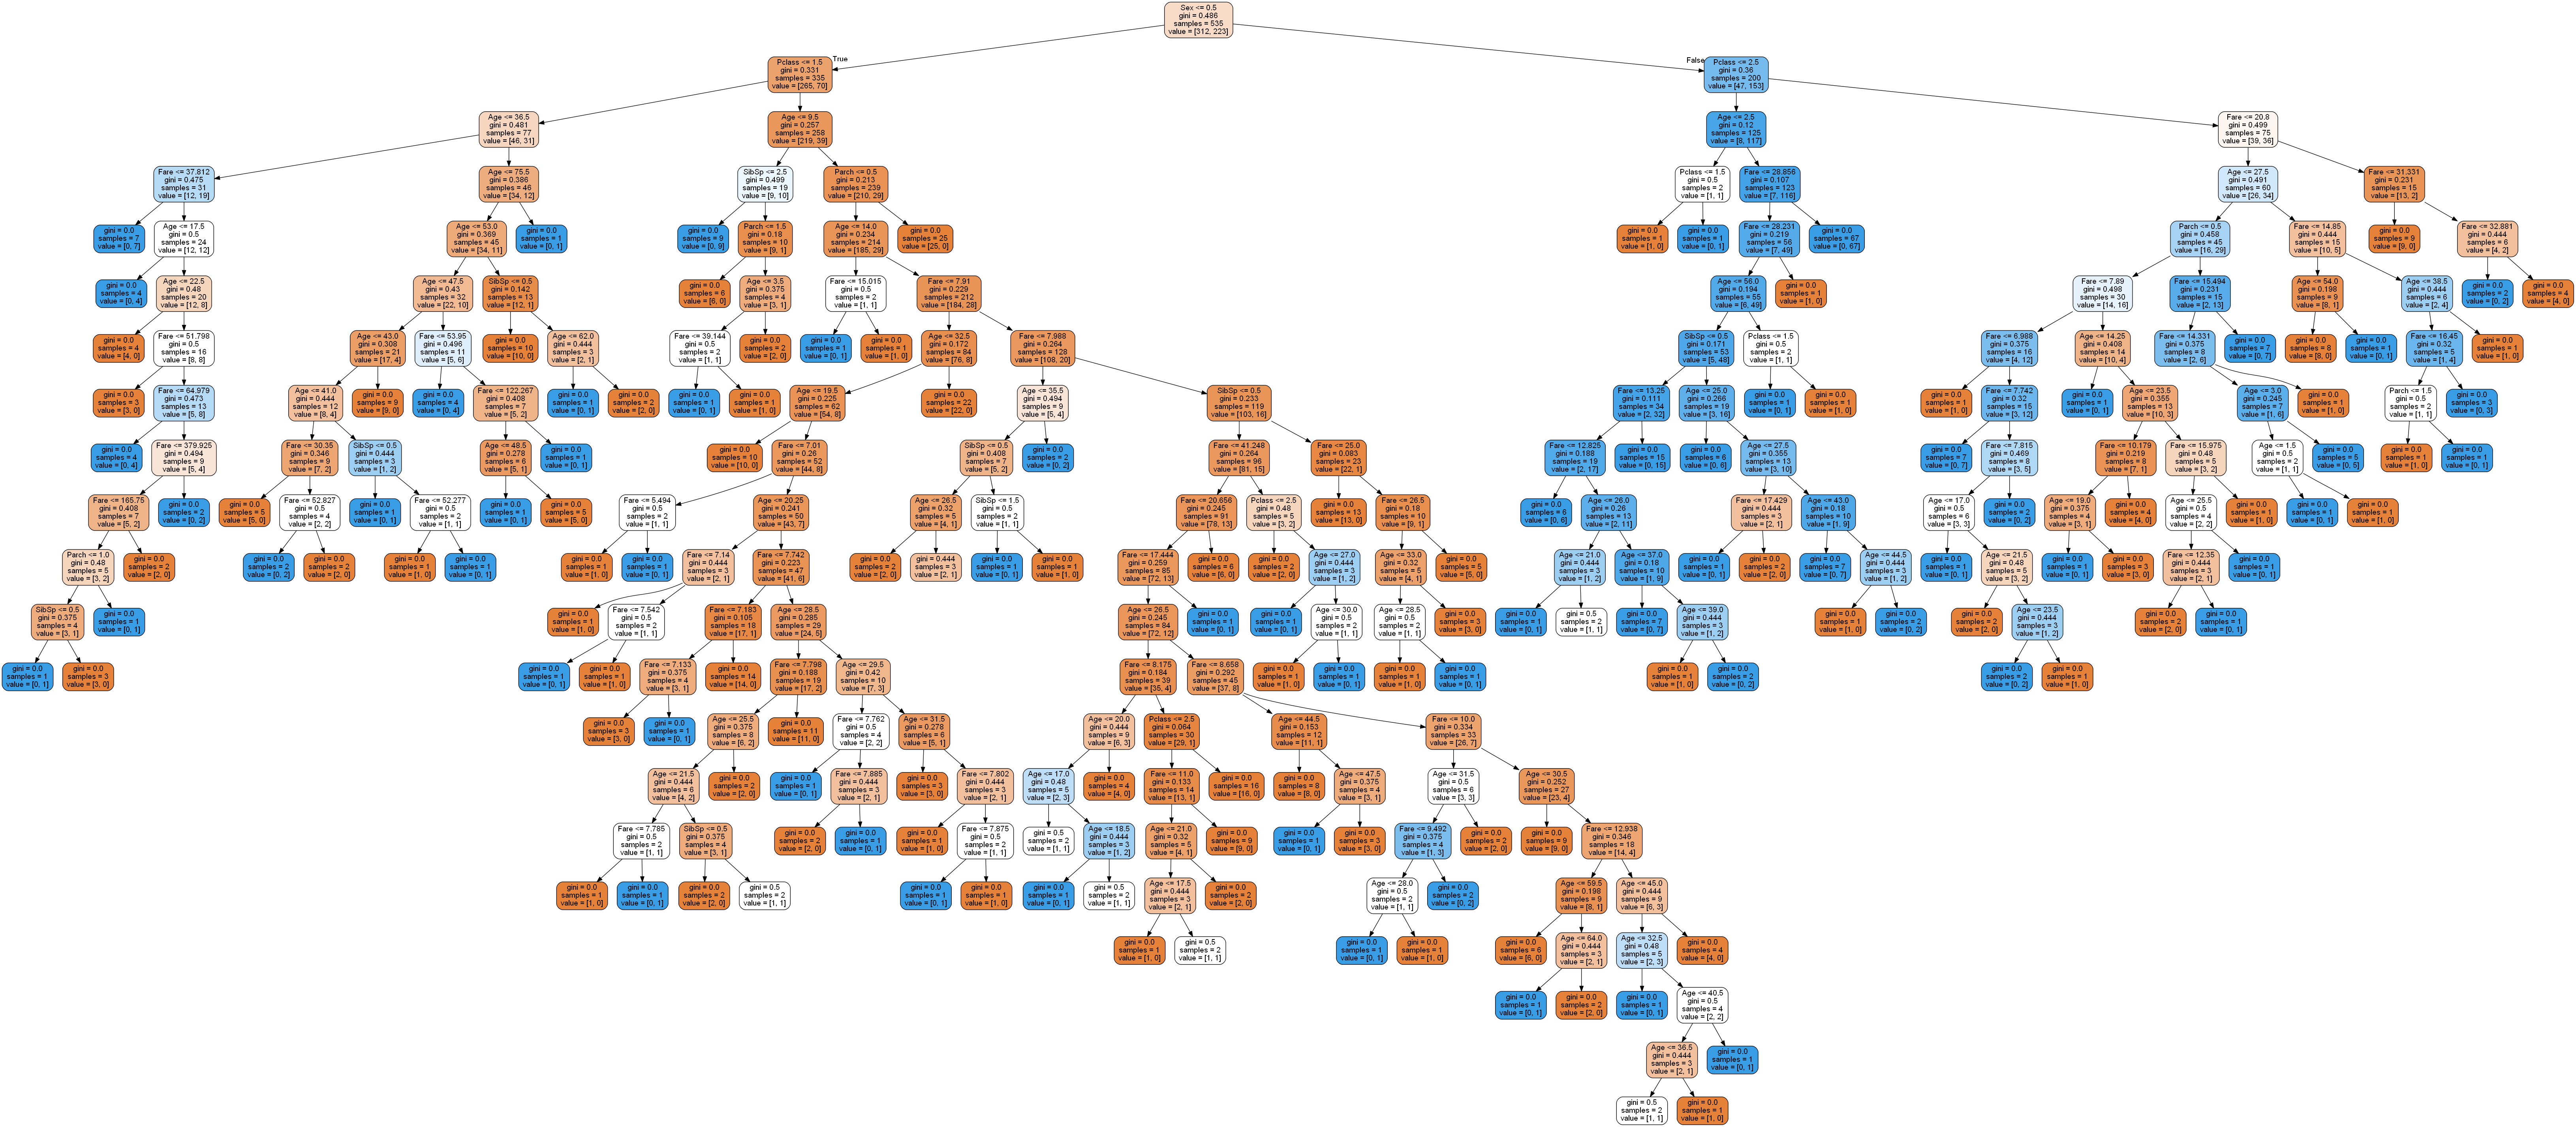

In [19]:
from IPython.display import Image
Image(filename='tree.png')

# Decision Tree with max_depth

In [20]:
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Defining some of the attributes like max_depth, max_leaf_nodes, and min_samples_leaf can help prevent overfitting the model to the training data.



In [21]:
model = tree.DecisionTreeClassifier(max_depth = 5)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

from sklearn.metrics import accuracy_score

print (accuracy_score(y_test, y_predict))
from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Predicted Not Survival', 'Predicted Survival'],
    index=['True Not Survival', 'True Survival']
)

0.8547486033519553


,Predicted Not Survival,Predicted Survival
True Not Survival,102,10
True Survival,16,51


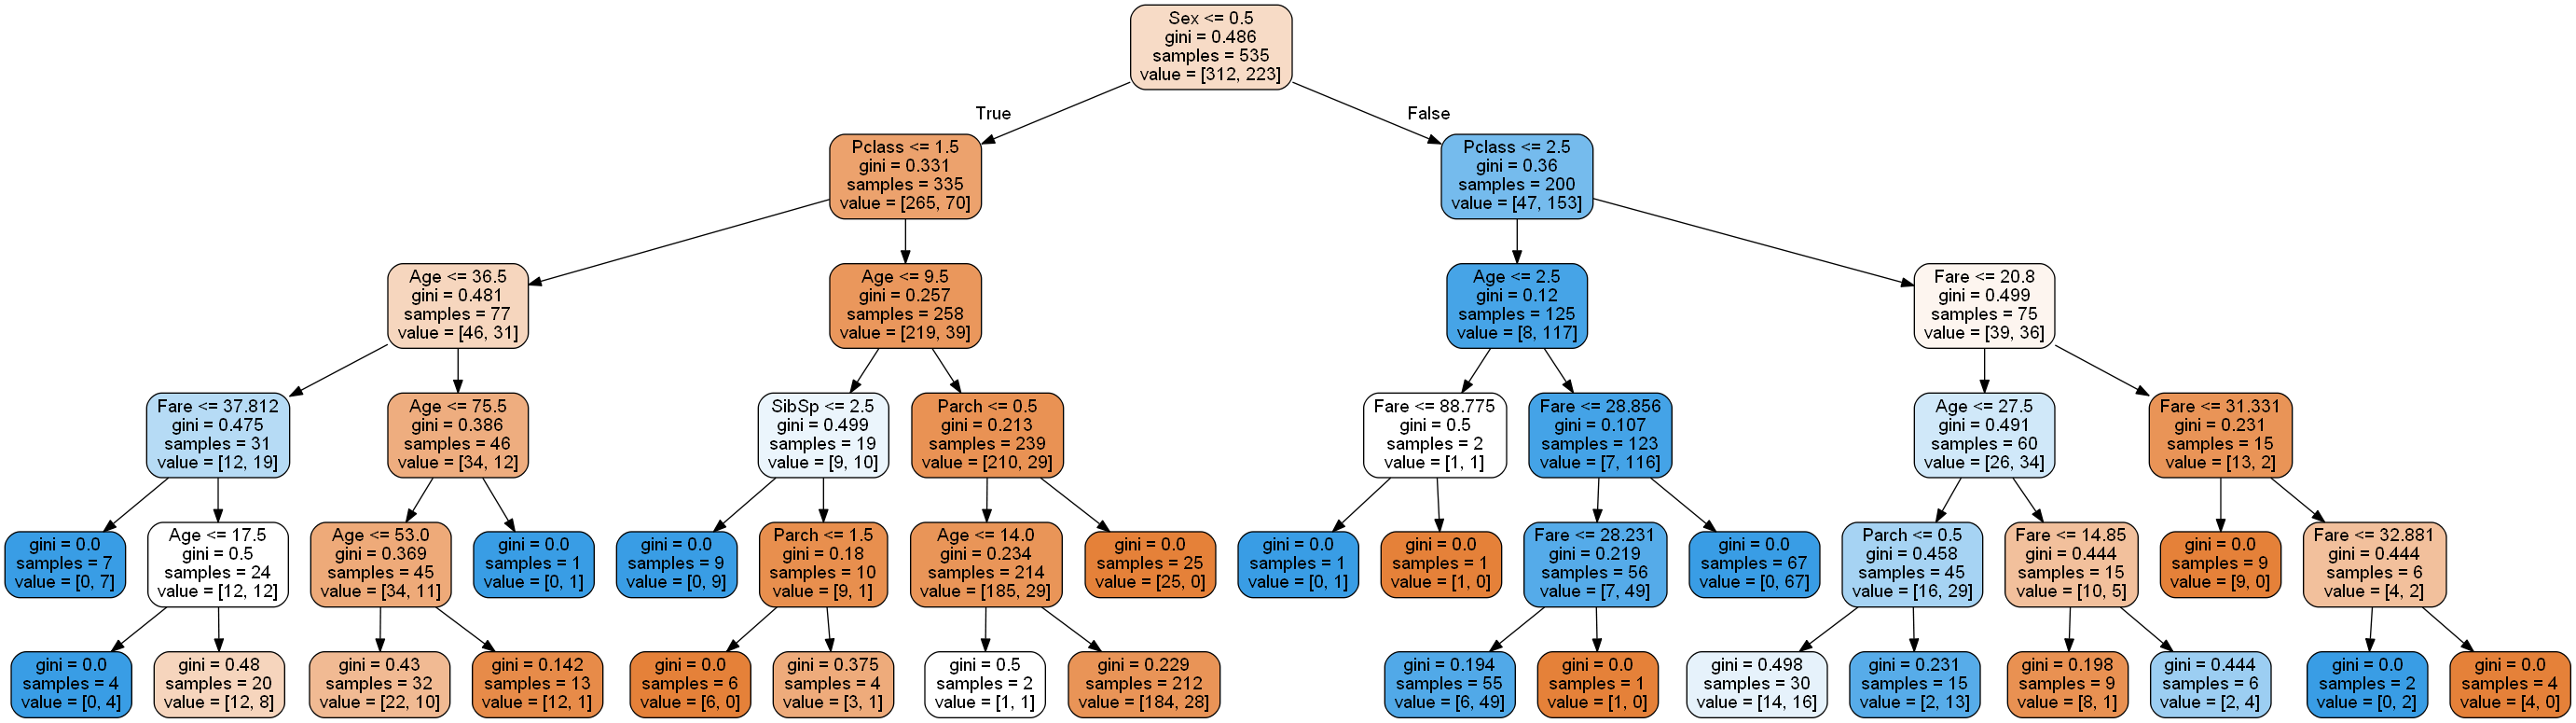

In [22]:
dot_data = tree.export_graphviz(model,
                                feature_names=X.columns,
                                out_file='tree.dot',
                                filled=True,
                                rounded=True)

!dot -Tpng tree.dot > tree.png

from IPython.display import Image
Image(filename='tree.png')

# Decision Tree with max_leaf_nodes

In [23]:
model = tree.DecisionTreeClassifier(max_leaf_nodes = 10)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

from sklearn.metrics import accuracy_score

print (accuracy_score(y_test, y_predict))
from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Predicted Not Survival', 'Predicted Survival'],
    index=['True Not Survival', 'True Survival']
)

0.8491620111731844


,Predicted Not Survival,Predicted Survival
True Not Survival,99,13
True Survival,14,53


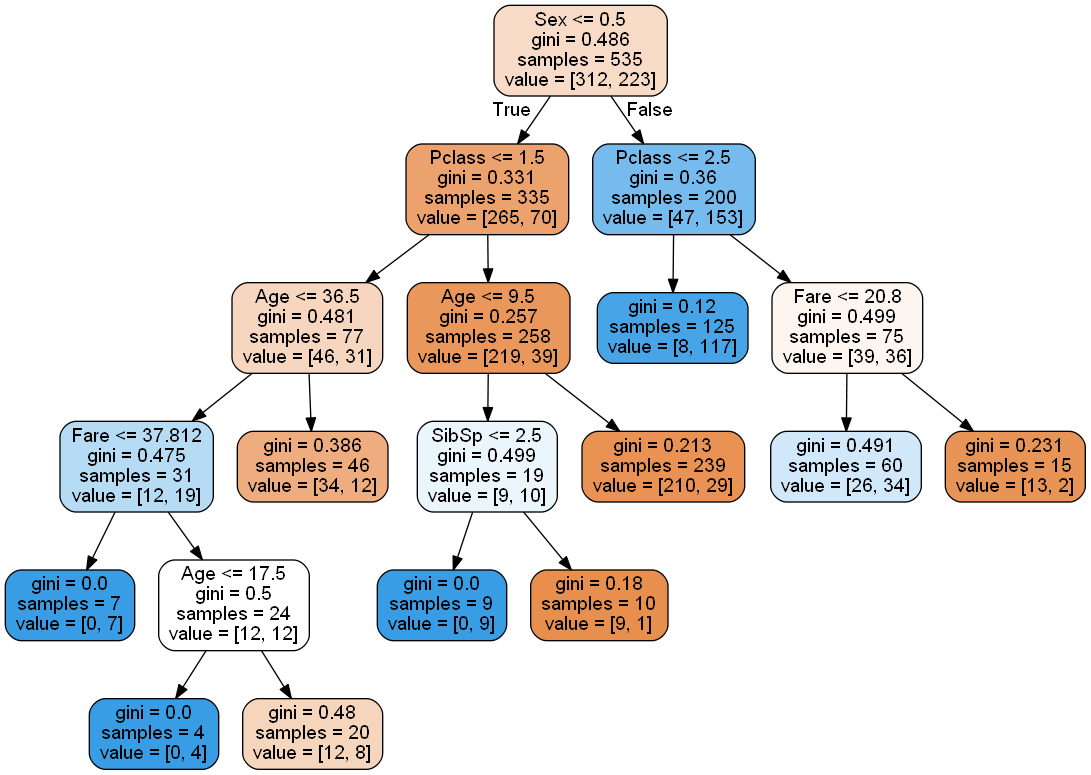

In [24]:
dot_data = tree.export_graphviz(model,
                                feature_names=X.columns,
                                out_file='tree.dot',
                                filled=True,
                                rounded=True)

!dot -Tpng tree.dot > tree.png

from IPython.display import Image
Image(filename='tree.png')

# Random Forest

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(criterion = 'gini',
                               n_estimators = 25,
                               random_state = 1)


C:\Users\adm\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, class_weight=None)

In [26]:
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

from sklearn.metrics import accuracy_score

print (accuracy_score(y_test, y_predict))
from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Predicted Not Survival', 'Predicted Survival'],
    index=['True Not Survival', 'True Survival']
)

0.8379888268156425


,Predicted Not Survival,Predicted Survival
True Not Survival,101,11
True Survival,18,49


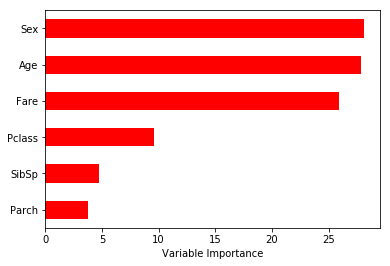

In [27]:
Importance = pd.DataFrame({'Importance':model.feature_importances_*100}, index=X_train.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

# Random Forest with top 3

0.8044692737430168


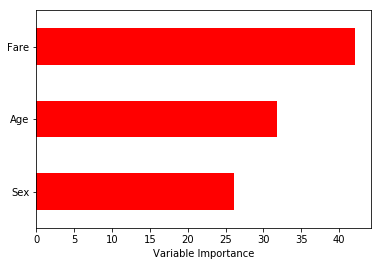

In [28]:
X = df[['Sex', 'Age', 'Fare']]
y = df['Survived']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(criterion = 'gini',
                               n_estimators = 25,
                               random_state = 1)

model.fit(X_train, y_train)
y_predict = model.predict(X_test)

from sklearn.metrics import accuracy_score

print (accuracy_score(y_test, y_predict))
from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Predicted Not Survival', 'Predicted Survival'],
    index=['True Not Survival', 'True Survival'])

Importance = pd.DataFrame({'Importance':model.feature_importances_*100}, index=X_train.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [51]:



from sklearn.cross_validation import cross_val_score
for i in range(2,10):
    
    CVscore=cross_val_score(tree.DecisionTreeClassifier(max_leaf_nodes =i),X_train,y_train,cv=5)
    #print(i)
    print(CVscore.mean())

0.7813283306229876
0.777607319892631
0.7794242311435047
0.7850496679010169
0.7925442635370337
0.7775204582116942
0.7869367869015198
0.7850849350496679
